# TASK 4: Predictive Modelling
**Build and evaluate predictive models that form the core of a dynamic, risk-based pricing system**

In [1]:
import sys
import os
import pandas as pd
from glob import glob

In [2]:
from pathlib import Path
from importlib import reload
# add the project root to the path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [3]:
# In this task, we will prepare and clean the dataset for further analysis.
# First, we will load the module for data loading 
from src.data_loader import DataLoader
import src.data_loader
reload(src.data_loader)

<module 'src.data_loader' from 'D:\\Research & Project\\10academy\\week 3\\challenge\\insurisk-analytics-and-predictive-modeling\\src\\data_loader.py'>

In [4]:
raw_data_dir = '../data'
loader = DataLoader(raw_data_dir)
# Load the dataset
df = loader.load_data('MachineLearningRating_v3.txt')
# Display the first few rows of the dataset
df.head()

D:\Research & Project\10academy\week 3\challenge\insurisk-analytics-and-predictive-modeling\src\data_loader.py:17: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(file_path, sep="|")
D:\Research & Project\10academy\week 3\challenge\insurisk-analytics-and-predictive-modeling\src\data_loader.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['VehicleIntroDate'] = pd.to_datetime(self.data['VehicleIntroDate'], errors='coerce')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## Data preparation

In [5]:
# Loading modules  for the data preparation,Model fitting and evaluation
from src.Model import Model
import src.Model
reload(src.Model)
insurance_model = Model(df)

In [6]:
# Encoding datasets
print("Encoding the data...")
new_df=insurance_model.data_encode()

Encoding the data...


In [7]:
new_df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,0,0,2,0,2,0,...,10,26,21,5,1,2,0,0,21.929825,0.0
1,145249,12827,2015-05-01,True,0,0,2,0,2,0,...,10,26,21,5,1,2,0,0,21.929825,0.0
2,145249,12827,2015-07-01,True,0,0,2,0,2,0,...,10,26,21,5,1,2,0,0,0.000000,0.0
3,145255,12827,2015-05-01,True,0,0,2,0,2,0,...,1,16,13,5,1,2,0,0,512.848070,0.0
4,145255,12827,2015-07-01,True,0,0,2,0,2,0,...,1,16,13,5,1,2,0,0,0.000000,0.0


### Splitting the data

In [8]:
X = new_df.drop('TotalPremium', axis=1)
y = new_df['TotalPremium']
X_train, X_test, y_train, y_test = insurance_model.split_data(X, y)

# Drop datetime columns that cause DTypePromotionError
datetime_cols = ['TransactionMonth', 'VehicleIntroDate']
X_train_fixed = X_train.drop(columns=datetime_cols)
X_test_fixed = X_test.drop(columns=datetime_cols)

# Impute missing values with column mean (for numeric columns)
X_train_fixed = X_train_fixed.fillna(X_train_fixed.mean())
X_test_fixed = X_test_fixed.fillna(X_train_fixed.mean())

# Drop columns that are still all NaN (e.g., NumberOfVehiclesInFleet)
X_train_fixed = X_train_fixed.dropna(axis=1, how='all')
X_test_fixed = X_test_fixed.dropna(axis=1, how='all')

# Ensure no NaNs remain
assert not X_train_fixed.isnull().any().any(), "There are still NaNs in X_train_fixed!"
assert not X_test_fixed.isnull().any().any(), "There are still NaNs in X_test_fixed!"

Data split: X_train=(800078, 51), X_test=(200020, 51), y_train=(800078,), y_test=(200020,)


## Fitting the Models

In [9]:
# Linear Regression, Decision Tree, Random Forest, and XGBoost models
lr_model, dt_model, rfr_model, xgb_model = insurance_model.train_models(X_train_fixed, y_train)


Training models...
Fitting models...
  Linear Regression...
  Decision Tree...
  Random Forest...
  XGBoost...
Models trained successfully.


## Evaluating the Model

In [11]:
# Evaluate models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_scores, mse_scores, r2_scores = [], [], []
for model in [lr_model, dt_model, rfr_model, xgb_model]:
    mae, mse, r2, _ = insurance_model.evaluate_models(model,X_test_fixed, y_test)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)





Evaluating models...
  Evaluating LinearRegression...
  Accuracy: 0.4275

Evaluating models...
  Evaluating DecisionTreeRegressor...
  Accuracy: 0.8845

Evaluating models...
  Evaluating RandomForestRegressor...
  Accuracy: 0.8900

Evaluating models...
  Evaluating XGBRegressor...
  Accuracy: 0.7102


## Plotting the results



Generating visualizations...


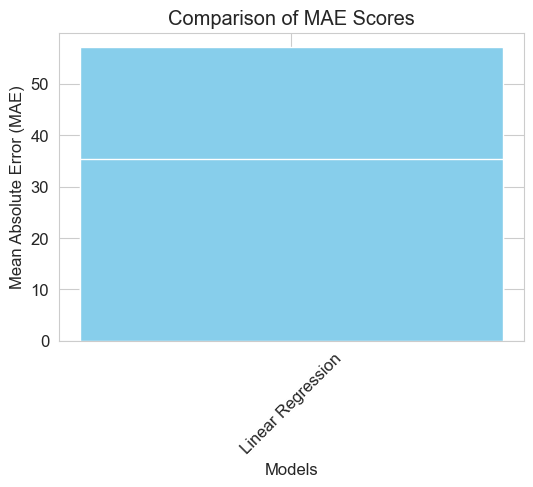

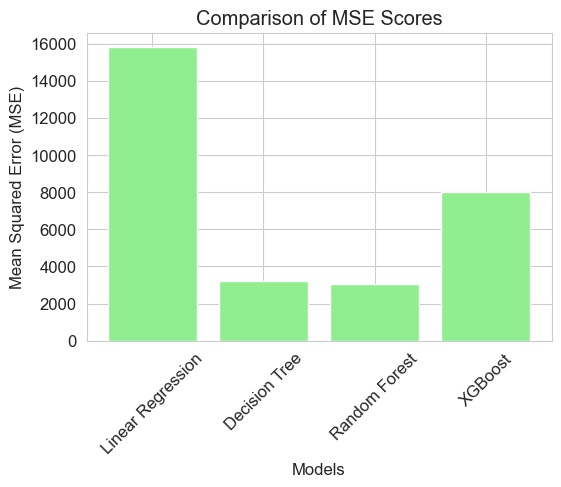

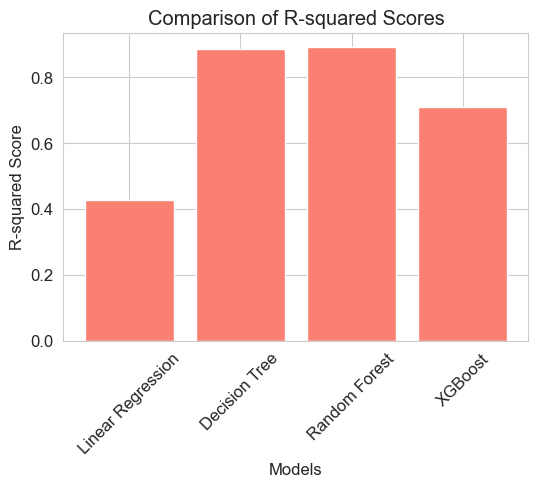

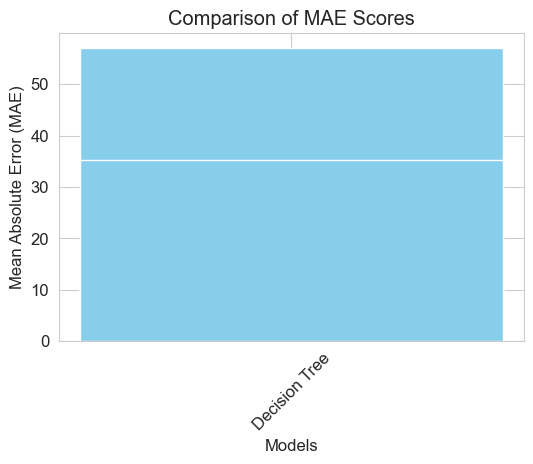

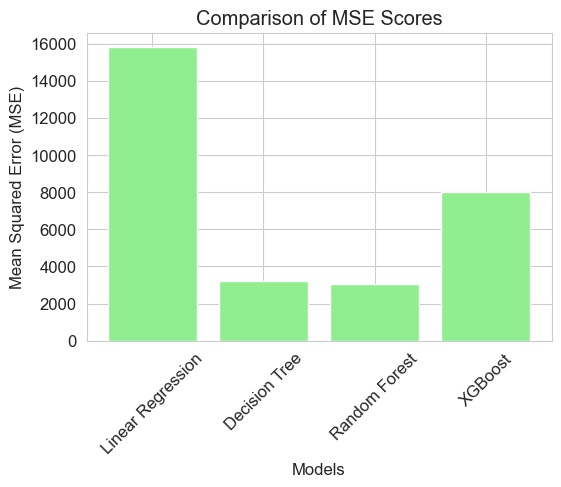

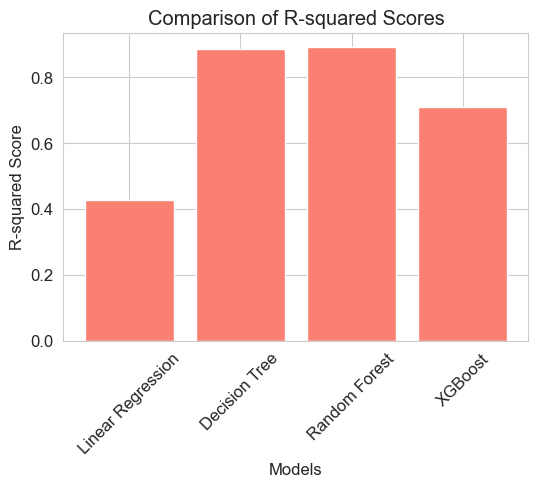

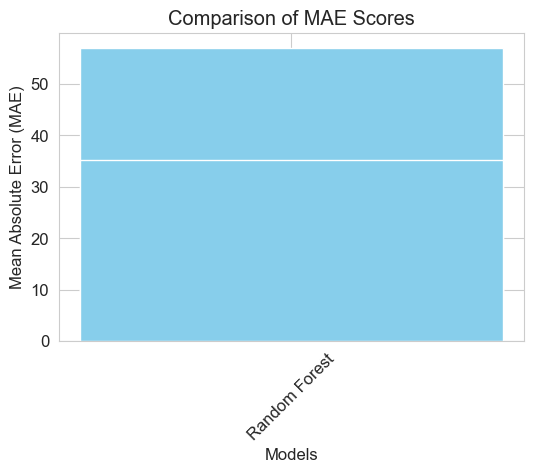

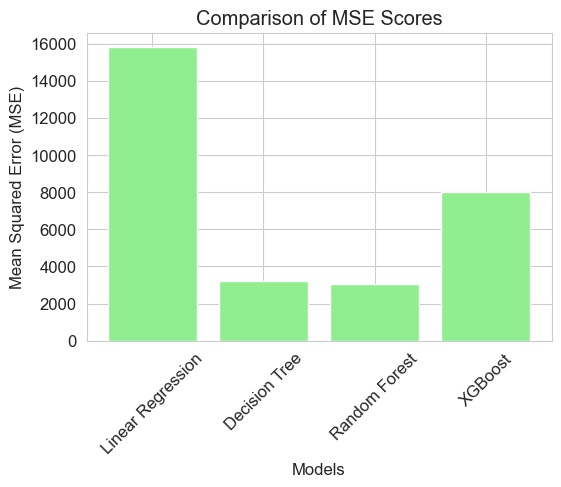

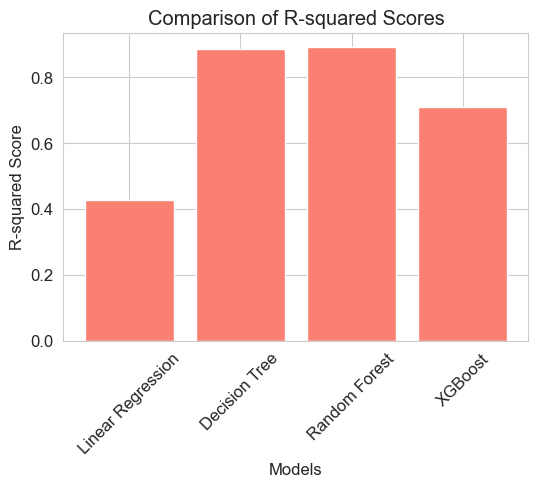

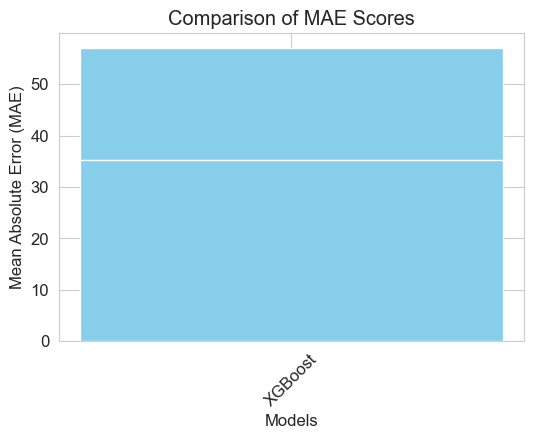

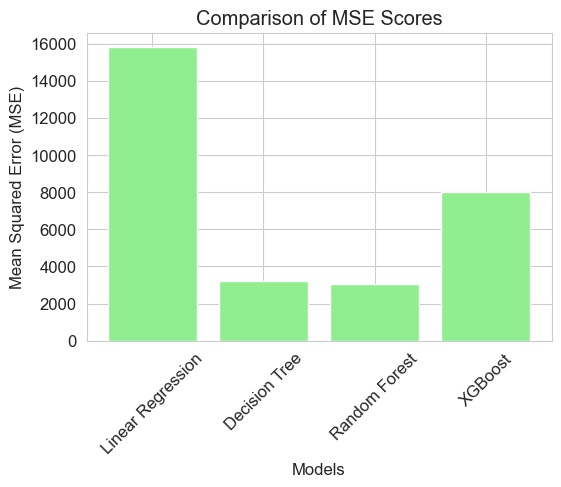

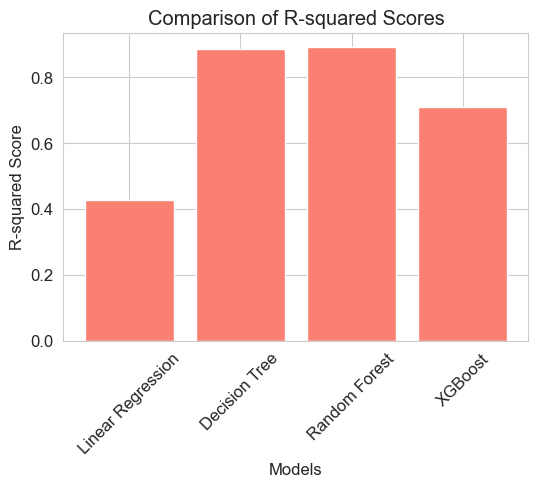

In [12]:
# Plot metrics
insurance_model.visualize_results(models, mae_scores, mse_scores, r2_scores)